# 2 수출의 내용을 따져보자

출처: UNCTAD (2012), [*A Practical Guide to Trade Policy Analysis*](https://unctad.org/topic/trade-analysis/trade-policy-analysis), [Chapter 1](https://unctad.org/system/files/official-document/gds2012d2_ch1_en.pdf).

- [1. 수출의 부문별 비중](#1.-수출의-부문별-비중)
- [2. 수출의 나라별 비중](#2.-수출의-나라별-비중)
- [3. 수출의 성장 방향성(1)](#3.-수출의-성장-방향성(1))
- [4. 수출의 성장 방향성(2)](#4.-수출의-성장-방향성(2))

## 1. 수출의 부문별 비중

- 한 국가의 수출이 어느 부문(sector)에 집중되어 있는지를 분석한다.
<br><br>
- 아래 예는 콜롬비아를 대상으로 1990년과 2000년 전체 수출액에서 각 생산 부문(ISIC 3자리)이 차지하는 비중을 계산해서 막대그래프로 제시한다.(ISIC는 UN의 국제표준산업분류다.)
<br><br>
- 석유정제(petroleum refineries) 산업이 1990년과 2000년 모두 주요 수출 부문을 구성했지만, 1990년에는 전체 수출의 20% 이상을 차지하던 비중이 2000년에는 15% 미만으로 감소했다. 
<br><br>
- 반면에 산업용화학제품(industrial chemicals), 화학제품(other chemicals), 의류(wearing apparel except footwear), 운송장비(transport equipment)의 비중은 같은 기간 동안 모두 증가했다. 예를 들어, 운송장비의 전체 수출 비중은 1% 미만에서 5% 이상으로 성장했다.

### 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TPP.dta 파일 읽기
df = pd.read_stata("../Data/TPP.dta")
df

,sector,ccode,year,isic3d_3dig,wage_bill,value_added,output,n_female_emp,n_establ,n_employees,...,tar_sdahs,tar_minahs,tar_maxahs,tar_savg_mfn,tar_iwmfn,tar_sdmfn,tar_minmfn,tar_maxmfn,tar_hs_lines,id
0,Food products,ARG,1976,311,NaN,NaN,NaN,NaN,NaN,302783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Food products,ARG,1977,311,NaN,NaN,NaN,NaN,NaN,289400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Food products,ARG,1978,311,NaN,NaN,NaN,NaN,NaN,258174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Food products,ARG,1979,311,NaN,NaN,NaN,NaN,NaN,257338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,Food products,ARG,1980,311,NaN,NaN,NaN,NaN,NaN,244513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81195,Other manufactured products,ZAF,2000,390,102427.867188,NaN,NaN,NaN,NaN,22030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800.0
81196,Other manufactured products,ZAF,2001,390,90033.312500,NaN,NaN,NaN,NaN,18168.0,...,9.13,0.0,30.0,6.44,3.13,9.33,0.0,30.0,187.0,2800.0
81197,Other manufactured products,ZAF,2002,390,82382.859375,NaN,NaN,NaN,NaN,18571.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800.0
81198,Other manufactured products,ZAF,2003,390,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800.0


**변수 설명**

- `ccode`: 국가 식별 코드  
- `year`: 연도  
- `exp_tv`: 총수출액  
- `sector`: 부문 코드(ISIC 3자리)

### 수출의 부문별 비중 계산

In [2]:
# 각 나라, 연도별 총수출액 계산 (by ccode & year)
df['total_export'] = df.groupby(['ccode', 'year'])['exp_tv'].transform('sum')

# 각 행의 수출 비중 계산
df['export_share'] = df['exp_tv'] / df['total_export']

# 각 국가, 연도별로 export_share를 내림차순 정렬
df = df.sort_values(by=['ccode', 'year', 'export_share'], ascending=[True, True, False])

# 각 나라, 연도별 순위 생성
df['ranking'] = df.groupby(['ccode', 'year']).cumcount() + 1

# 필요한 변수만 선택
df = df[['ranking', 'sector', 'ccode', 'year', 'export_share']]

# 국가 코드와 부문(sector)별 그룹 id 생성
df['id'] = df.groupby(['ccode', 'sector']).ngroup()

# 'year'에 따라 데이터를 wide 형식으로 변환
df_wide = df.pivot(index=['id', 'ccode', 'sector'], 
                   columns='year', values=['ranking', 'export_share'])
df_wide.columns = [f"{var}{year}" for var, year in df_wide.columns]
df_wide = df_wide.reset_index()

# 데이터 확인
df_wide.head()

,id,ccode,sector,ranking1976,ranking1977,ranking1978,ranking1979,ranking1980,ranking1981,ranking1982,...,export_share1995,export_share1996,export_share1997,export_share1998,export_share1999,export_share2000,export_share2001,export_share2002,export_share2003,export_share2004
0,0,ARG,Beverages,2.0,2.0,2.0,2.0,15.0,18.0,17.0,...,0.012418,0.011486,0.012894,0.014669,0.014807,0.015941,0.014962,0.013227,0.013902,0.014117
1,1,ARG,Fabricated metal products,23.0,23.0,23.0,23.0,14.0,13.0,11.0,...,0.011464,0.010508,0.010598,0.009396,0.009107,0.008476,0.009707,0.008798,0.007129,0.008367
2,2,ARG,Food products,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.409555,0.444625,0.405617,0.400990,0.418084,0.361353,0.344330,0.387948,0.429200,0.428940
3,3,ARG,Footwear except rubber or plastic,7.0,7.0,7.0,7.0,23.0,23.0,21.0,...,0.004714,0.003190,0.004530,0.002652,0.001026,0.000458,0.000257,0.000382,0.000593,0.000629
4,4,ARG,Furniture except metal,9.0,9.0,9.0,9.0,27.0,28.0,27.0,...,0.003738,0.005327,0.005318,0.005233,0.008005,0.011327,0.012977,0.012310,0.009833,0.007449


In [3]:
# 필요 변수 선택
cols_order = ['sector', 'ccode', 'ranking1990', 'ranking2000', 'export_share1990', 'export_share2000']
df_wide = df_wide[cols_order]

# Colombia 데이터만 선택
df_wide = df_wide[df_wide['ccode'] == "COL"]

# 정렬: ranking1990 기준 내림차순
df_wide = df_wide.sort_values(by='ranking1990', ascending=False)

# 데이터 확인
df_wide

,sector,ccode,ranking1990,ranking2000,export_share1990,export_share2000
522,Plastic products,COL,28.0,19.0,0.001494,0.013567
528,Tobacco,COL,27.0,27.0,0.001751,0.003245
531,Wood products except furniture,COL,26.0,22.0,0.001892,0.006064
504,Beverages,COL,25.0,26.0,0.002344,0.003866
508,Furniture except metal,COL,24.0,21.0,0.003057,0.007803
515,Miscellaneous petroleum and coal products,COL,23.0,28.0,0.004177,0.000092
525,Professional and scientific equipment,COL,22.0,23.0,0.004604,0.005125
520,Paper and products,COL,21.0,11.0,0.005006,0.028522
529,Transport equipment,COL,20.0,7.0,0.005112,0.054375
516,Non-ferrous metals,COL,19.0,17.0,0.005408,0.015517


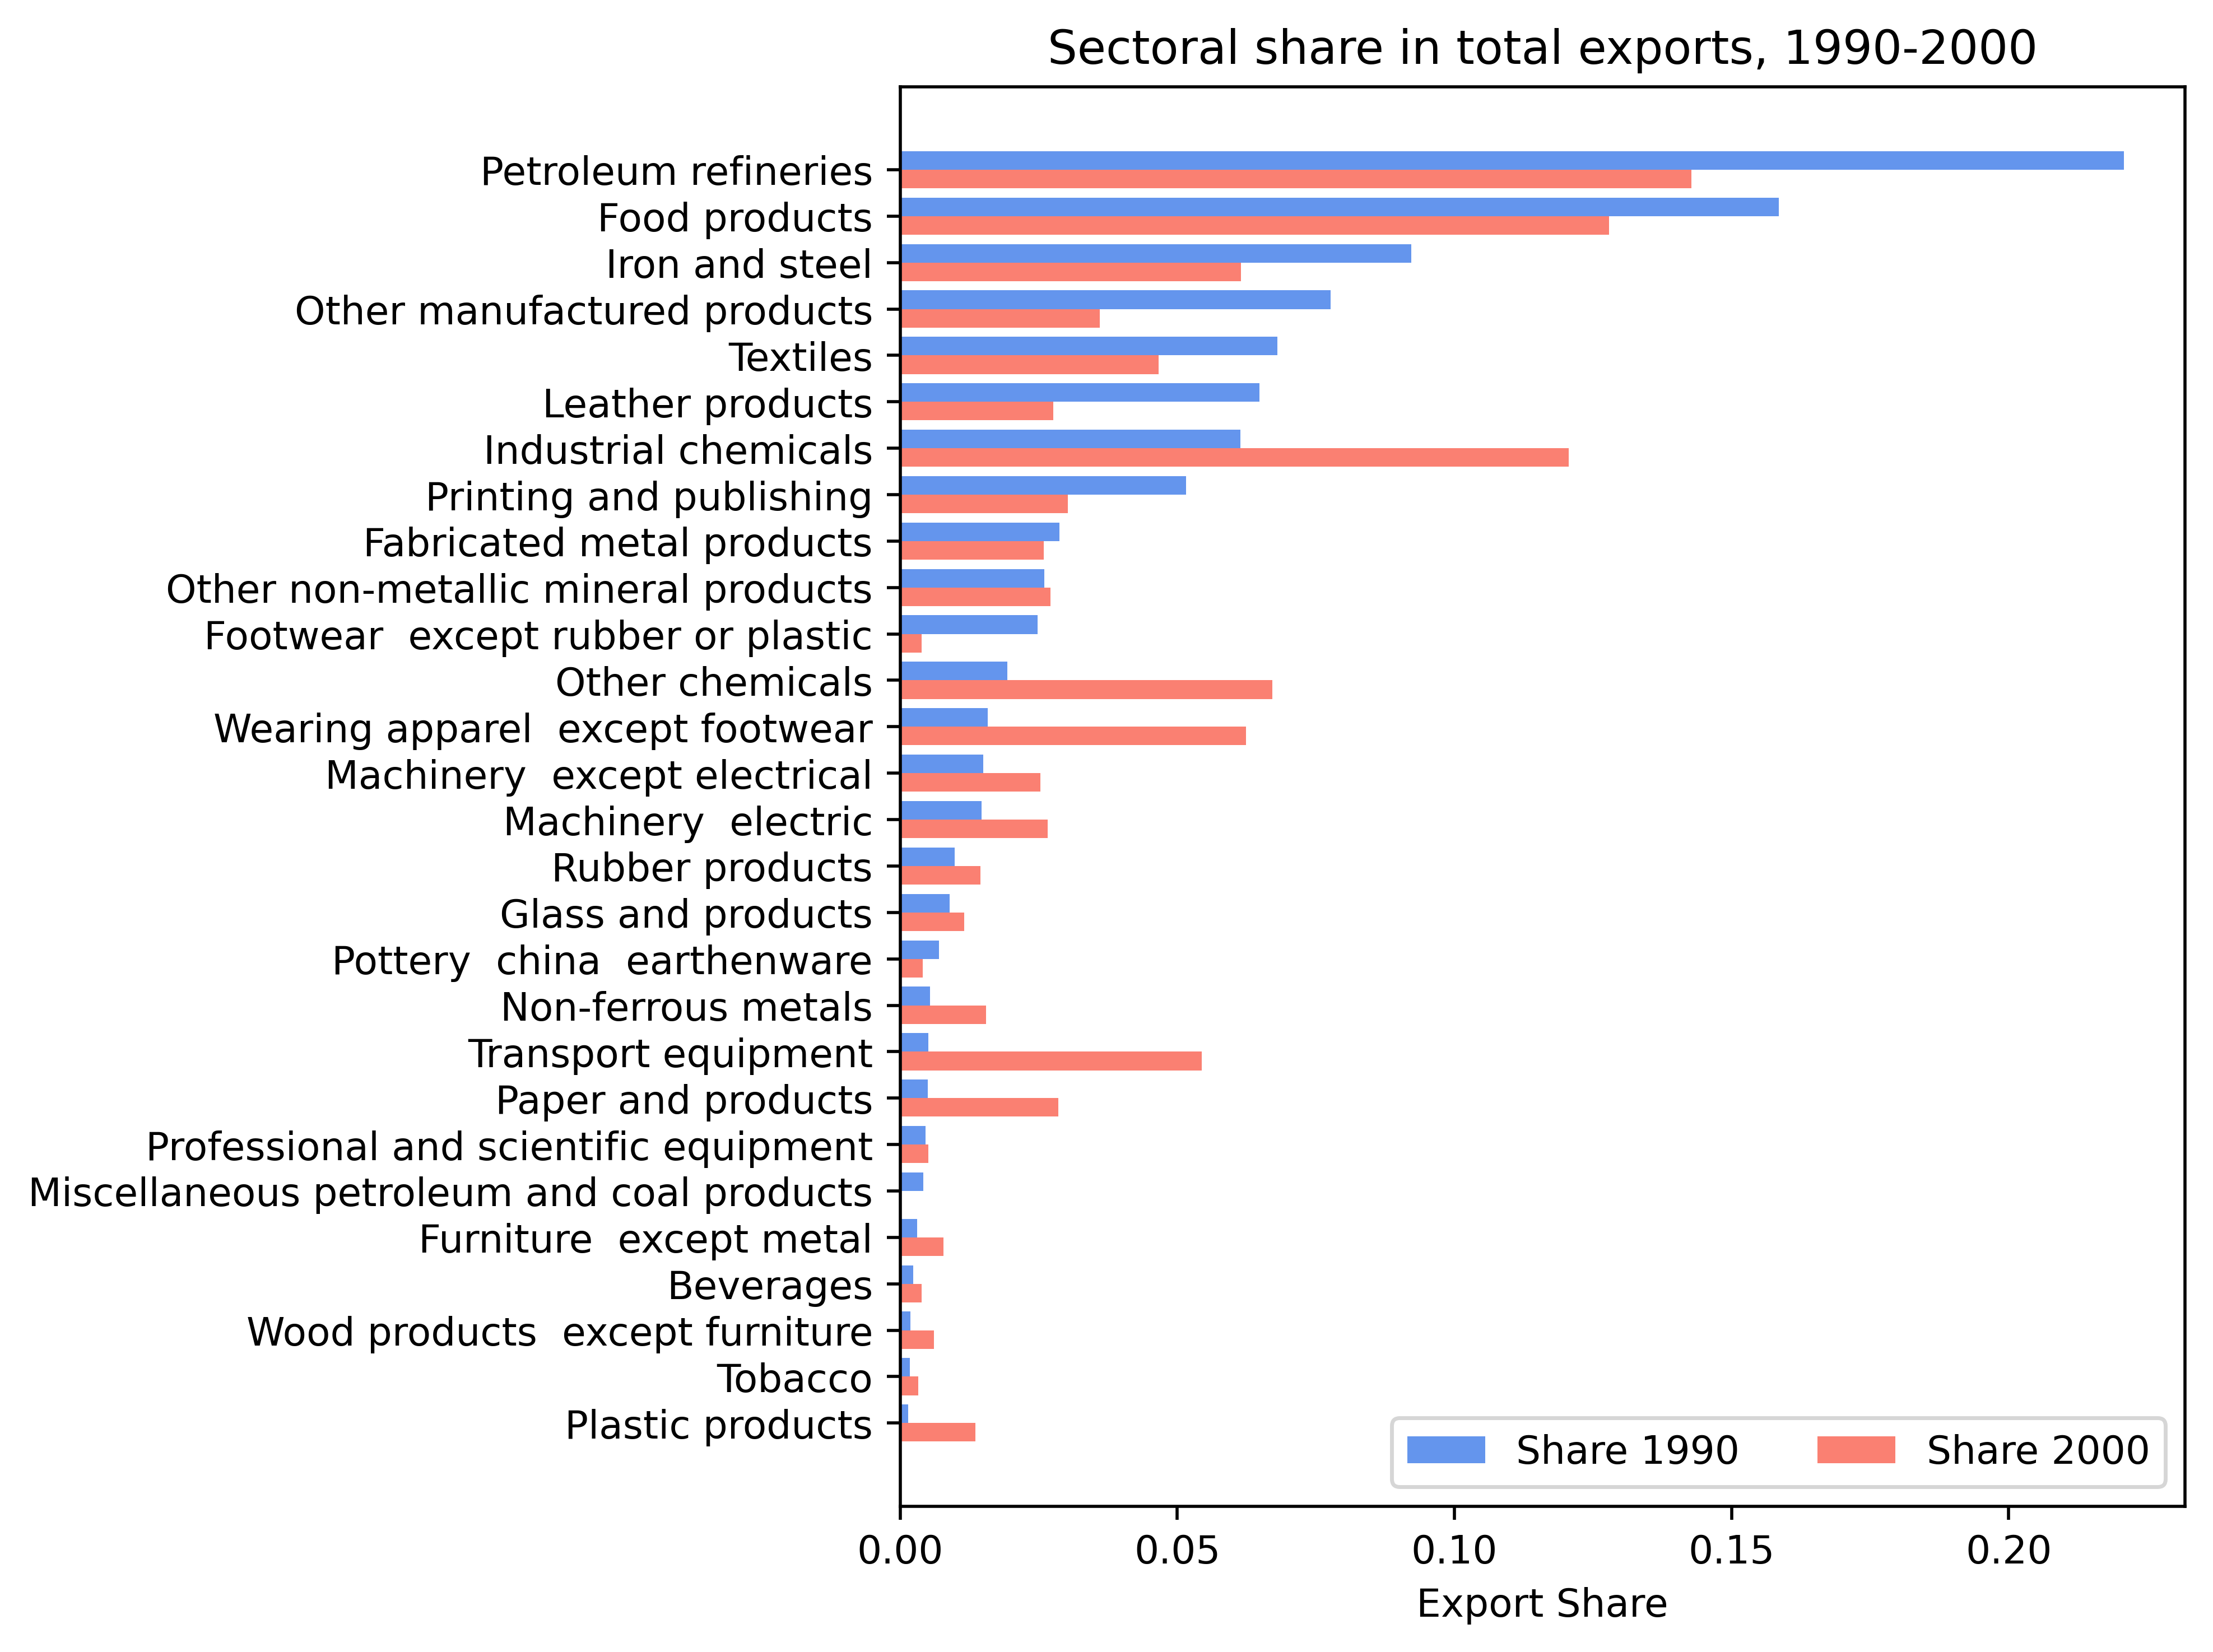

In [4]:
# 부문명을 y축 레이블로 사용 (정렬된 순서 유지)
y_pos = np.arange(len(df_wide))
bar_height = 0.4

plt.figure(figsize=(8, 6), dpi=500)
plt.barh(y_pos + bar_height/2, df_wide['export_share1990'], 
         height=bar_height, color='cornflowerblue', label="Share 1990")
plt.barh(y_pos - bar_height/2, df_wide['export_share2000'], 
         height=bar_height, color='salmon', label="Share 2000")
plt.yticks(y_pos, df_wide['sector'])
plt.xlabel("Export Share")
plt.title("Sectoral share in total exports, 1990-2000")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

## 2. 수출의 나라별 비중

- 한 국가의 수출이 어느 나라에 집중되어 있는지를 분석한다.
<br><br>
- 아래 예는 콜롬비아를 대상으로 1990년과 2000년 전체 수출액에서 대상국 각 나라가 차지하는 비중을 계산해서 막대그래프로 제시한다.
<br><br>
- 미국이 1990년과 2000년 모두 가장 중요한 수출 대상국임을 보여주지만, 미국으로의 수출 비중이 1990년에는 45% 이상이었으나 2000년에는 약 25%로 감소했다. 
<br><br>
- 반면, 베네수엘라, 에콰도르, 페루와 같은 인접 국가로의 수출 비중은 이 기간 동안 증가한 것을 확인할 수 있다.

### 데이터

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# aBilateralTrade.dta 파일 읽기
df = pd.read_stata("../Data/aBilateralTrade.dta")
df

,ccode,pcode,year,exp_tv,imp_tv
0,ABW,AIA,2002,773.573975,0.000000
1,ABW,AIA,2003,63.463001,0.000000
2,ABW,ALB,2004,0.000000,9.815000
3,ABW,ANT,1995,475.063997,1518.088998
4,ABW,ANT,1996,350.091993,1608.835018
...,...,...,...,...,...
403130,ZWE,ZMB,1999,54505.525404,16210.871972
403131,ZWE,ZMB,2000,69688.172039,0.000000
403132,ZWE,ZMB,2001,9792.663770,12135.245145
403133,ZWE,ZMB,2002,175256.748111,17891.870960


**변수 설명**

- `ccode`: 기준국 코드
- `pcode`: 상대국 코드
- `year`: 연도  
- `exp_tv`: 총수출액  
- `imp_tv`: 총수입액

### 수출의 나라별 비중 계산

In [6]:
# 각 나라, 연도별 총수출액 계산 (by ccode & year)
df['tot_exp'] = df.groupby(['ccode', 'year'])['exp_tv'].transform('sum')

# 각 행의 수출 비중 계산
df['export_share'] = df['exp_tv'] / df['tot_exp']

# 내림차순 정렬 (ccode, year별로 export_share 기준)
df = df.sort_values(by=['ccode', 'year', 'export_share'], ascending=[True, True, False])

# 그룹별 순위 생성
df['ranking'] = df.groupby(['ccode', 'year']).cumcount() + 1

# 필요한 변수 선택
df = df[['ranking', 'ccode', 'pcode', 'year', 'export_share']]

# 국가 코드와 파트너 코드별 그룹 id 생성
df['id'] = df.groupby(['ccode', 'pcode']).ngroup()

# 'year'에 따라 데이터를 wide 형식으로 변환
df_wide = df.pivot(index=['id', 'ccode', 'pcode'], 
                   columns='year', values=['ranking', 'export_share'])
df_wide.columns = [f"{var}{year}" for var, year in df_wide.columns]
df_wide = df_wide.reset_index()

# 데이터 확인
df_wide.head()

,id,ccode,pcode,ranking1976,ranking1977,ranking1978,ranking1979,ranking1980,ranking1981,ranking1982,...,export_share1995,export_share1996,export_share1997,export_share1998,export_share1999,export_share2000,export_share2001,export_share2002,export_share2003,export_share2004
0,0,ABW,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006742,0.000919,NaN
1,1,ABW,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,ABW,ANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.161659,0.141906,0.129129,0.063667,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ABW,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000006,0.0,NaN,0.001144,0.0
4,4,ABW,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000871,0.000000,NaN,0.000000,NaN,0.000270,0.0,0.000334,0.001108,0.0


In [7]:
# 필요 변수 선택
cols_order = ['ccode', 'pcode', 'ranking1990', 'ranking2000', 
              'export_share1990', 'export_share2000']
df_wide = df_wide[cols_order]

# Colombia 데이터만 선택
df_wide = df_wide[df_wide['ccode'] == "COL"]

# 정렬: ranking1990 기준 내림차순
df_wide = df_wide.sort_values(by='ranking1990', ascending=False)

# 상위 20개 파트너만 선택
df_wide = df_wide[df_wide['ranking1990'] <= 20]

# 데이터 확인
df_wide.head()

,ccode,pcode,ranking1990,ranking2000,export_share1990,export_share2000
6359,COL,CAN,20.0,23.0,0.008298,0.007027
6427,COL,ITA,19.0,11.0,0.008500,0.016025
6372,COL,CUB,18.0,28.0,0.009235,0.005582
6370,COL,CRI,17.0,9.0,0.009349,0.020759
6388,COL,ESP,16.0,13.0,0.009744,0.011477


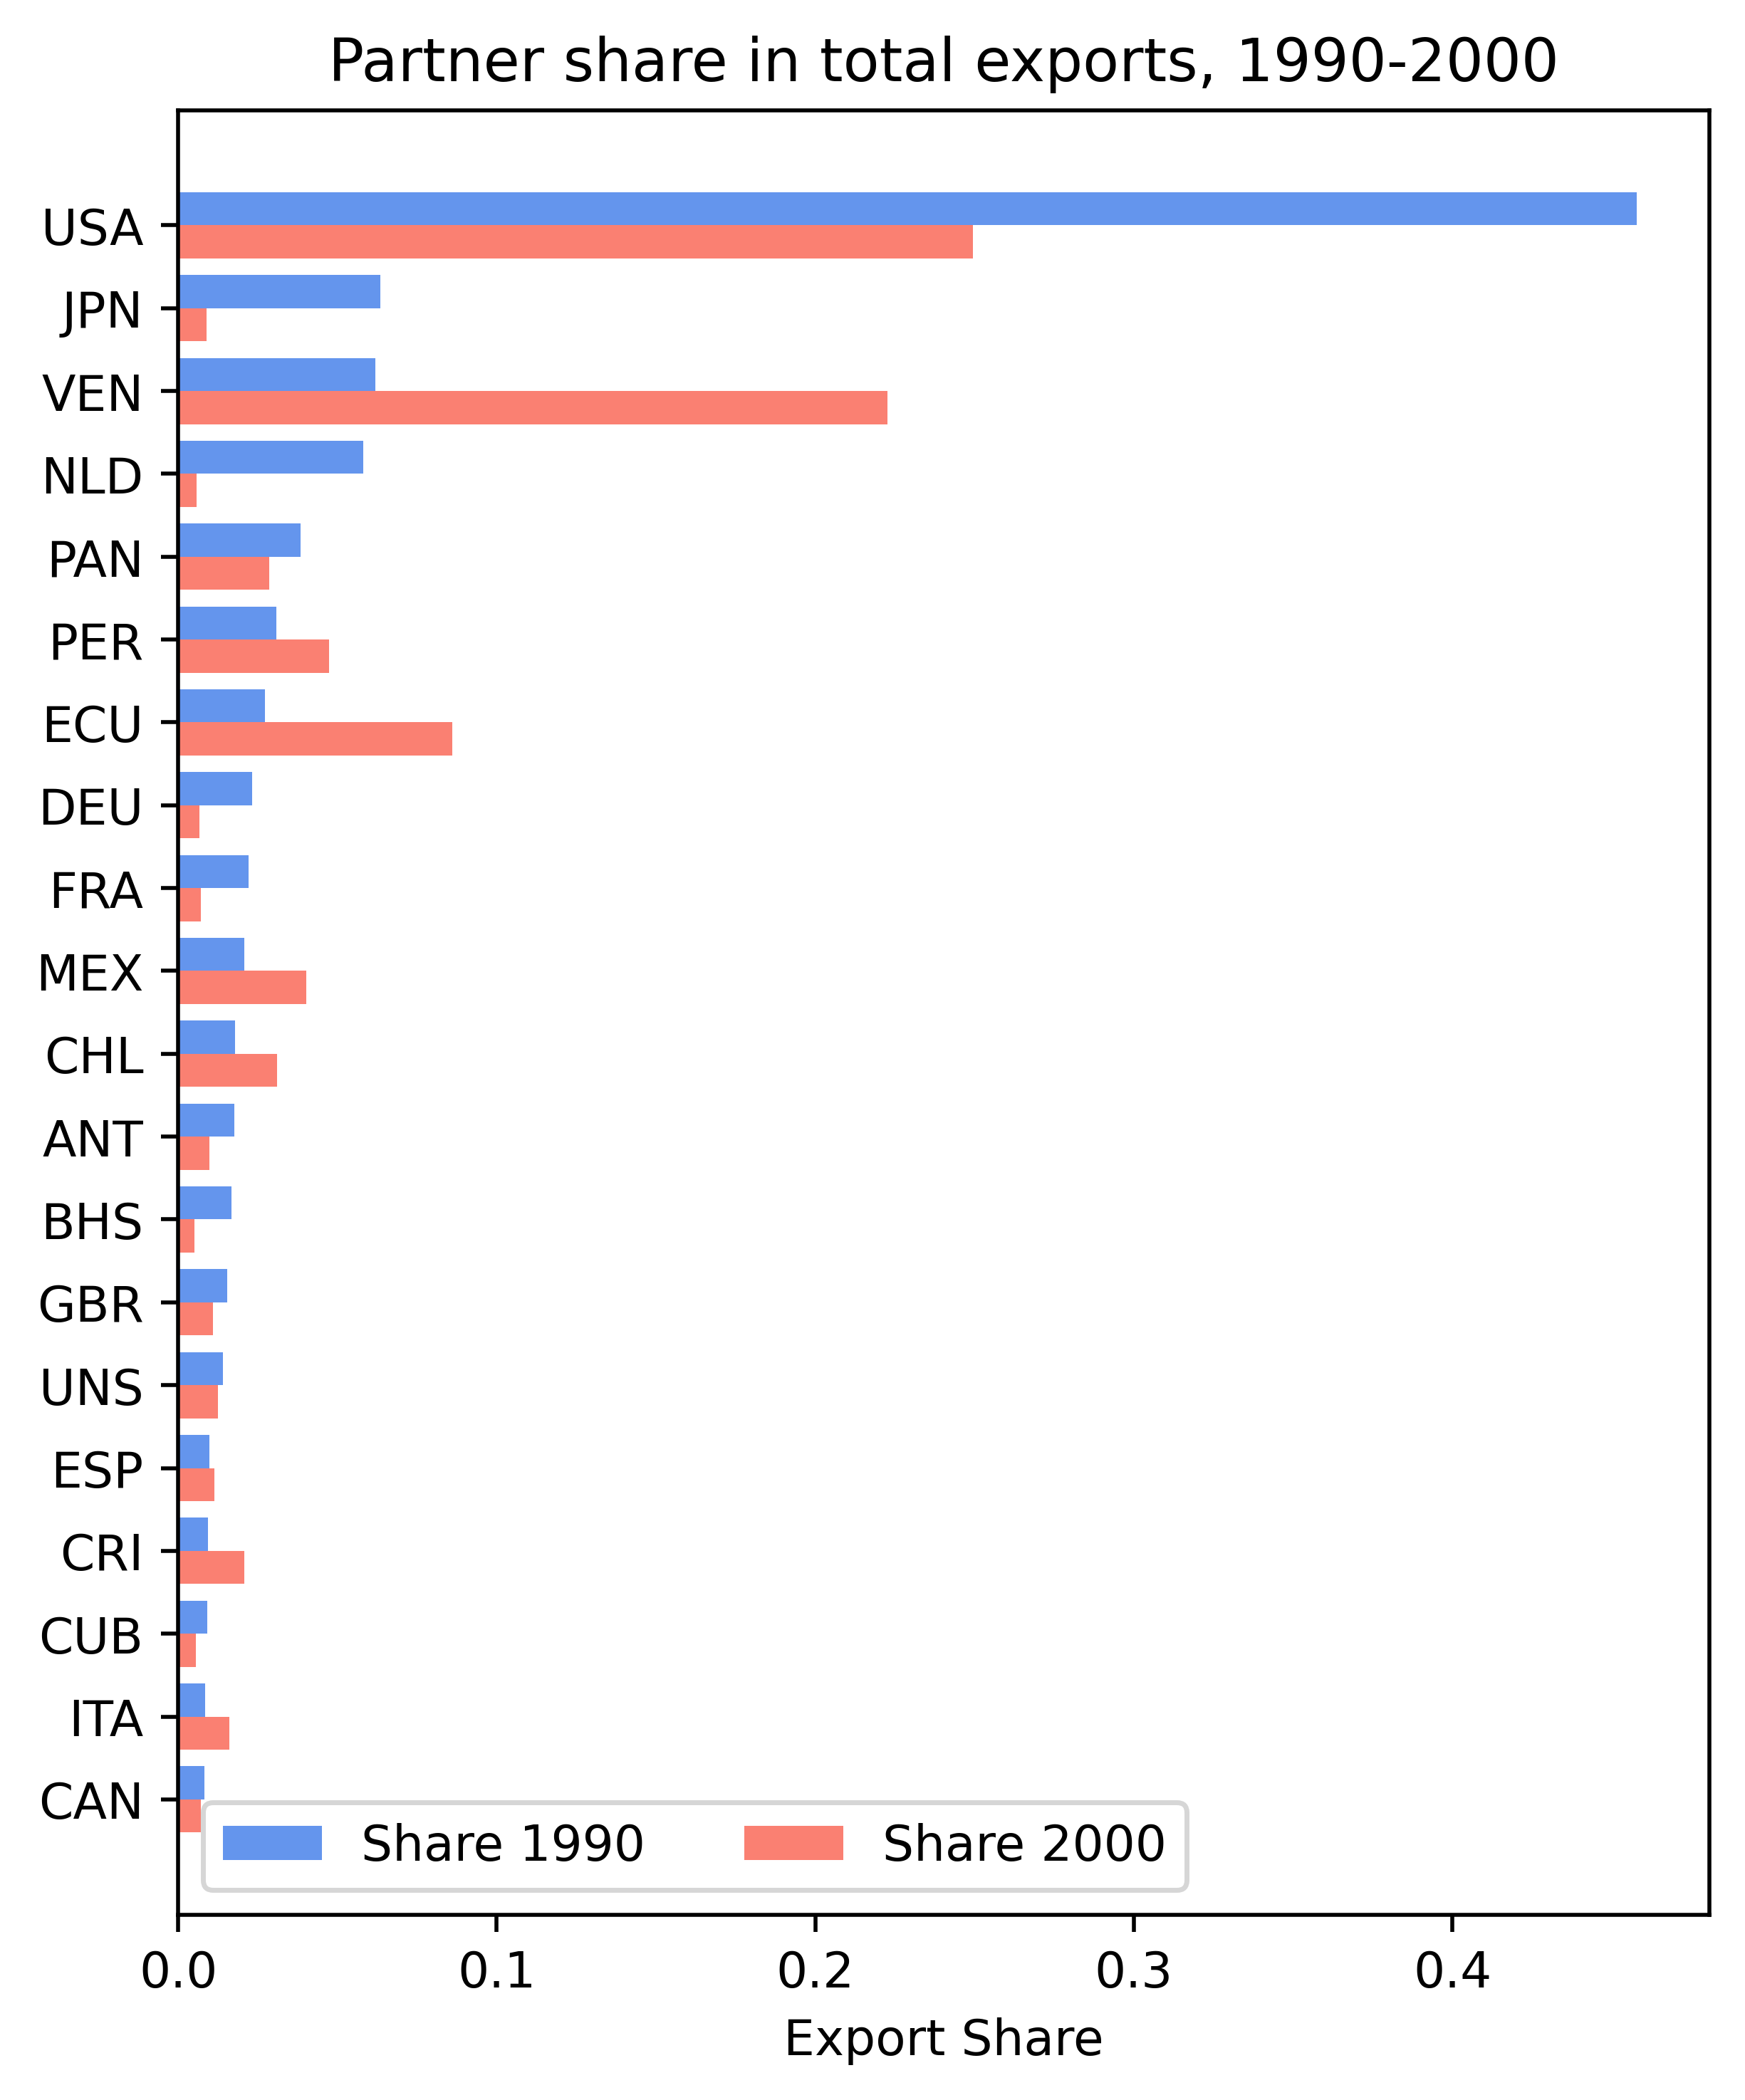

In [8]:
y_pos = np.arange(len(df_wide))
plt.figure(figsize=(5, 6), dpi=500)

plt.barh(y_pos + bar_height/2, df_wide['export_share1990'], 
         height=bar_height, color='cornflowerblue', label="Share 1990")
plt.barh(y_pos - bar_height/2, df_wide['export_share2000'], 
         height=bar_height, color='salmon', label="Share 2000")
plt.yticks(y_pos, df_wide['pcode'])
plt.xlabel("Export Share")
plt.title("Partner share in total exports, 1990-2000")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

## 3. 수출의 성장 방향성(1)

- 어떤 나라가 수입 성장률이 높은 분야나 나라에 얼마나 많이 수출하는지를 통해, 그 국가의 수출 방향성이 유리한지, 불리한지를 평가할 수 있다. 
<br><br>
- 가령 콜롬비아가 여러 수출 상대국 중, 미국에 압도적으로 수출을 많이 하고 있다고 해보자. 이 상황에서 미국이 아주 빠르게 성장하고, 그래서 미국의 (전세계로부터의) 수입 성장률이 아주 높은 상황이라면 콜롬비아의 수출 방향성이 유리하다고 평가할 수 있다. 간단히 말해서 콜롬비아가 수출 상대국을 잘 선택했다는 의미다. 
<br><br>
- 자국의 전체 수출에서 여러 수출 대상국이 차지하는 비중(로그값)을 $x$라고 하고, 지난 10년간 이들 수출 대상국의 평균 수입 성장률을 $y$라고 하자. 만약 두 변수 간에 양(음)의 상관관계가 나타난다면, 이는 자국이 상대적으로 성장률이 높은(낮은) 나라에 집중하고 있다는 의미다.
<br><br>
- 아래 분석은 2000년의 콜롬비아와 파키스탄을 분석한 것이다. 콜롬비아는 수출 방향성이 유리한 반면, 파키스탄은 불리한 것으로 나타난다. 파키스탄의 경우, 성장률이 낮은 걸프 및 중앙아시아 국가들과 인접해 있고, 빠르게 성장하는 인도와의 무역 통합에 실패한 결과로 여겨진다.

### 데이터(나라별)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# aBilateralTrade.dta 파일 읽기
df = pd.read_stata("../Data/aBilateralTrade.dta")
df

,ccode,pcode,year,exp_tv,imp_tv
0,ABW,AIA,2002,773.573975,0.000000
1,ABW,AIA,2003,63.463001,0.000000
2,ABW,ALB,2004,0.000000,9.815000
3,ABW,ANT,1995,475.063997,1518.088998
4,ABW,ANT,1996,350.091993,1608.835018
...,...,...,...,...,...
403130,ZWE,ZMB,1999,54505.525404,16210.871972
403131,ZWE,ZMB,2000,69688.172039,0.000000
403132,ZWE,ZMB,2001,9792.663770,12135.245145
403133,ZWE,ZMB,2002,175256.748111,17891.870960


### 수출의 나라별 비중 및 상대국 수입성장률

In [10]:
# 국가(ccode)와 연도별 총수출액 및 수출 비중 계산
df['tot_exp'] = df.groupby(['ccode', 'year'])['exp_tv'].transform('sum')
df['export_share'] = df['exp_tv'] / df['tot_exp']

# [목적국(pcode)별] 연도별 총수입(여기서는 exp_tv의 합으로 가정) 계산
imp = df.groupby(['pcode', 'year'])['exp_tv'].sum().reset_index().rename(
    columns={'exp_tv': 'totimppcode'})
imp = imp.sort_values(['pcode', 'year'])

# 각 pcode별로 전년도 값과 비교하여 성장률(gamma) 계산
imp['totimppcode_lag'] = imp.groupby('pcode')['totimppcode'].shift(1)
imp['gamma_totimppcode'] = imp['totimppcode'] / imp['totimppcode_lag'] - 1

# 1990~2000년 기간 동안 pcode별 평균 수입 성장률 계산
imp_avg = (imp[(imp['year'] >= 1990) & (imp['year'] <= 2000)]
           .groupby('pcode')['gamma_totimppcode']
           .mean()
           .reset_index()
           .rename(columns={'gamma_totimppcode': 'avg_imp_g_1990_2000'}))

# 원래 데이터와 목적국 수입 성장률 합치기
df = pd.merge(df, imp_avg, on='pcode', how='left')

# 0 이상의 값만 남기고 로그값 생성
df = df[(df['export_share'] > 0) & (df['avg_imp_g_1990_2000'] > 0)]
df['ln_x'] = np.log(df['export_share'])
df['ln_y'] = np.log(df['avg_imp_g_1990_2000'])

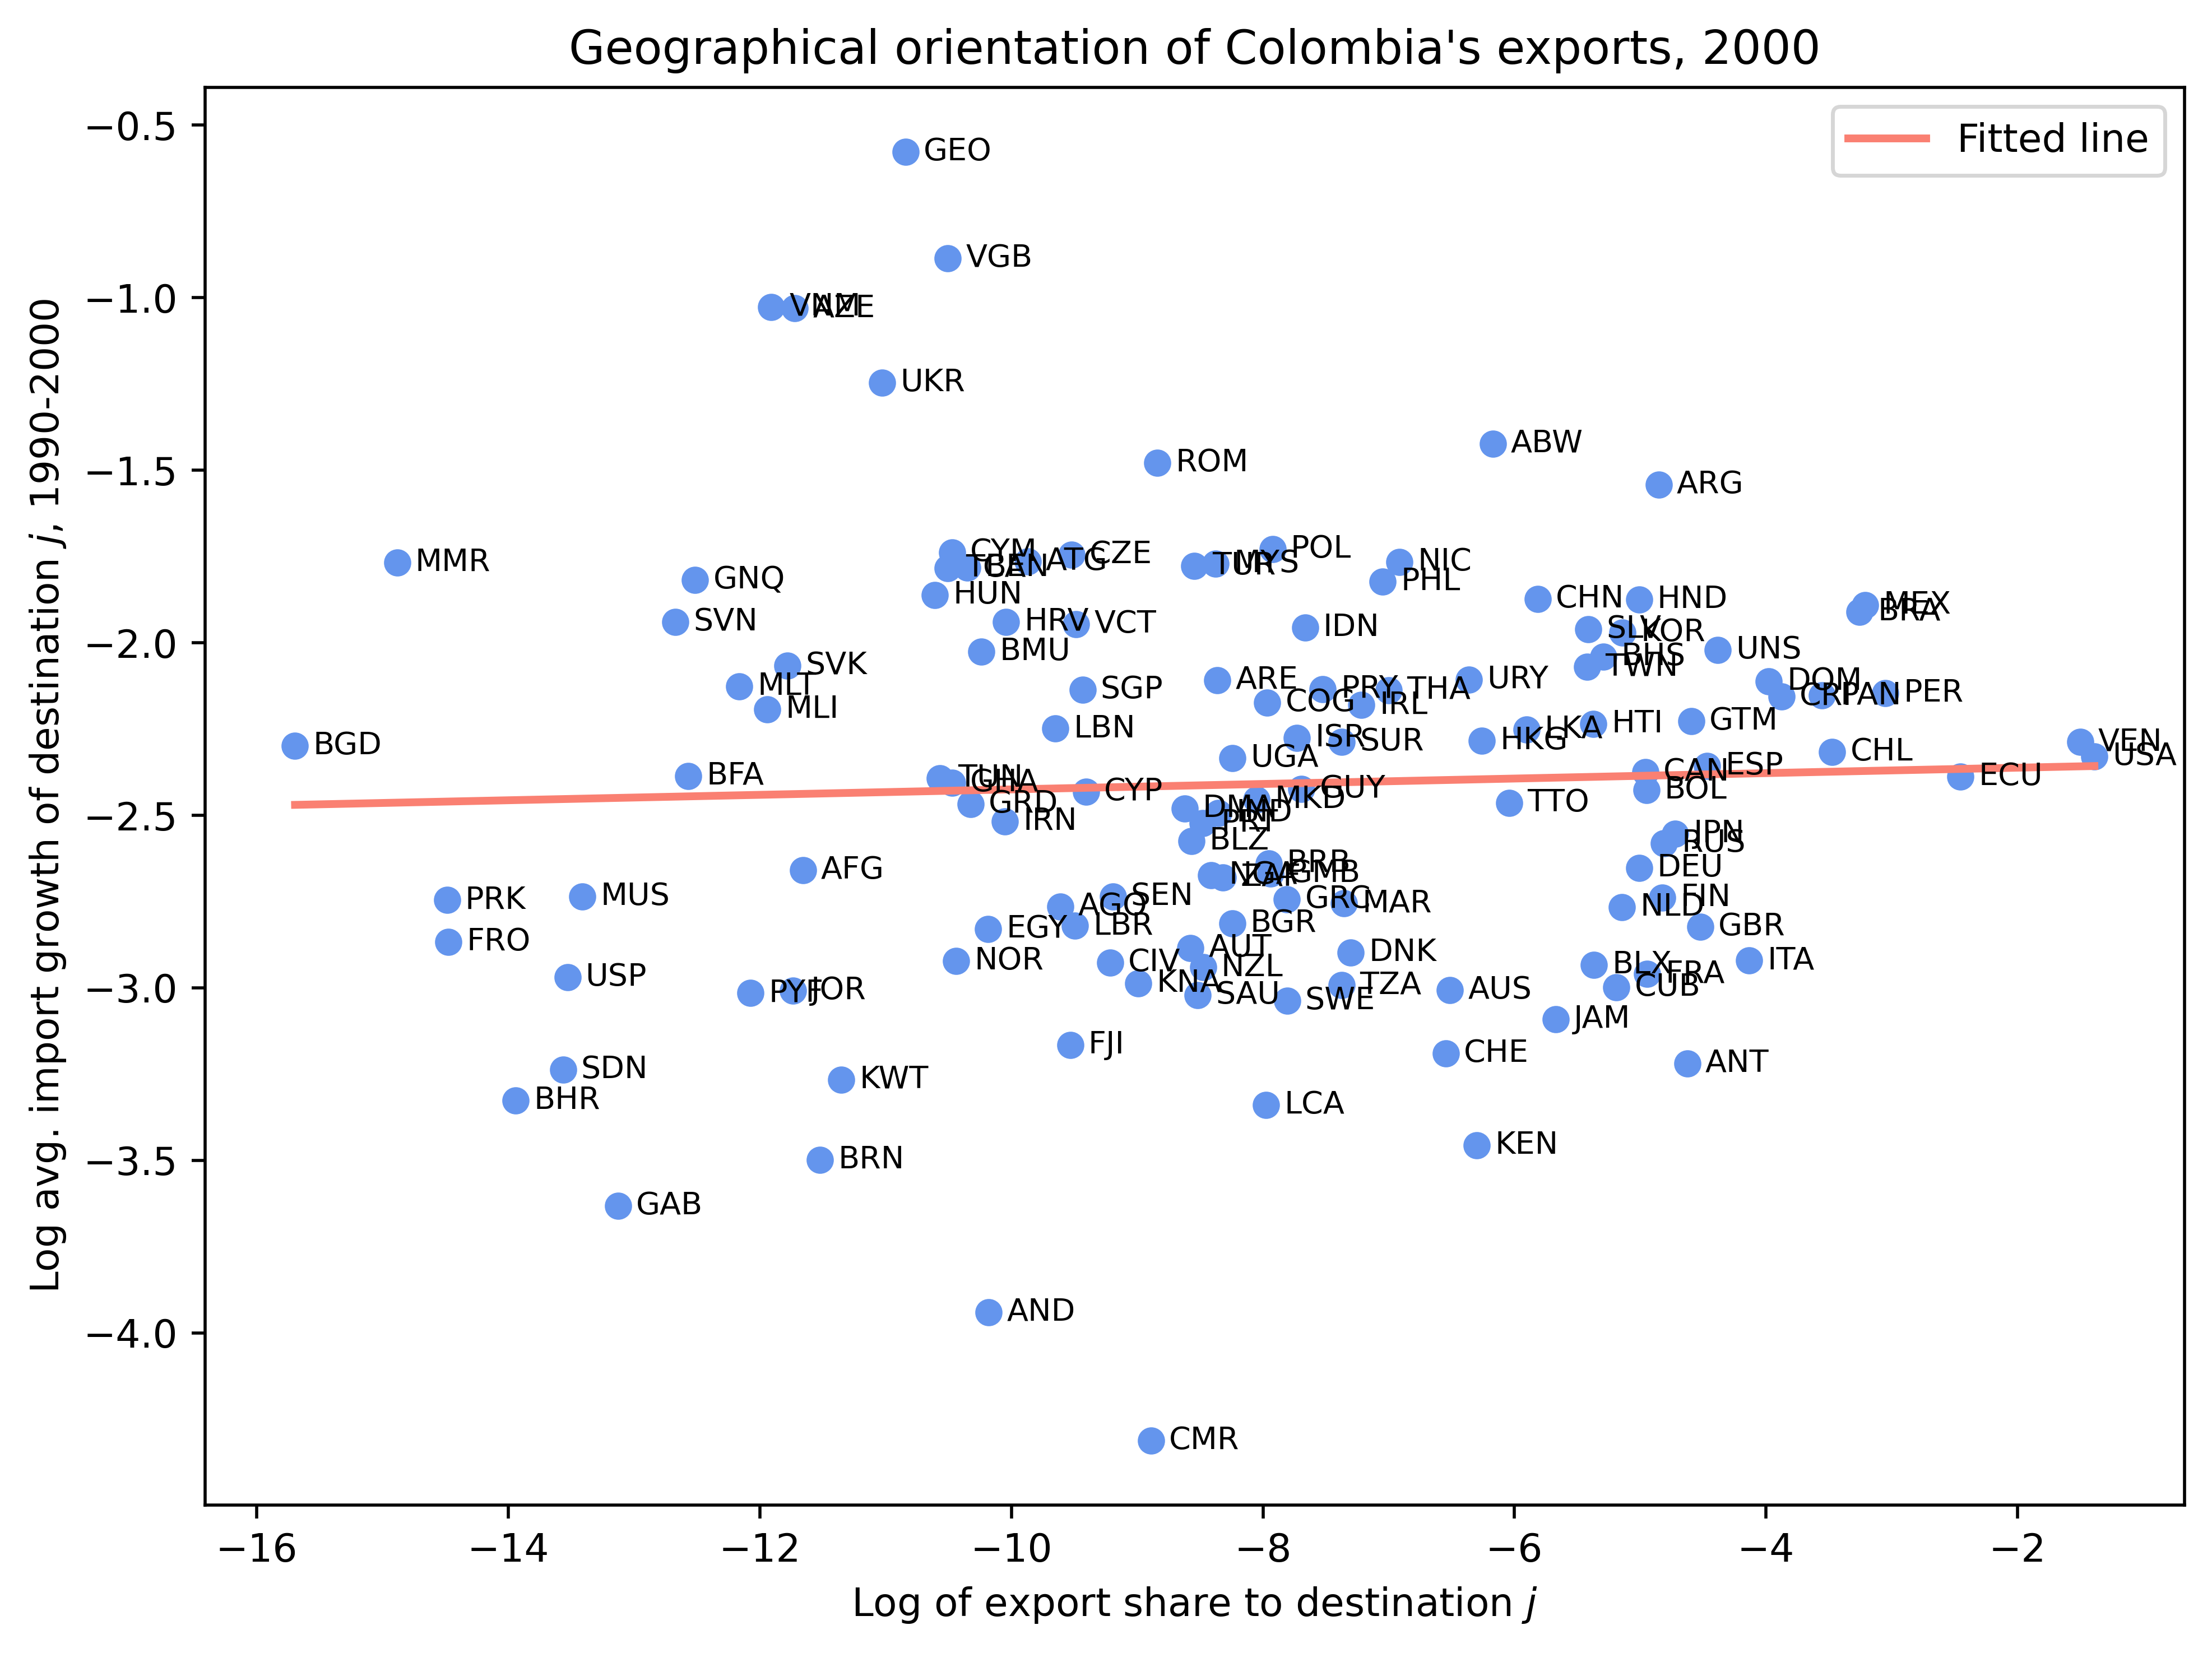

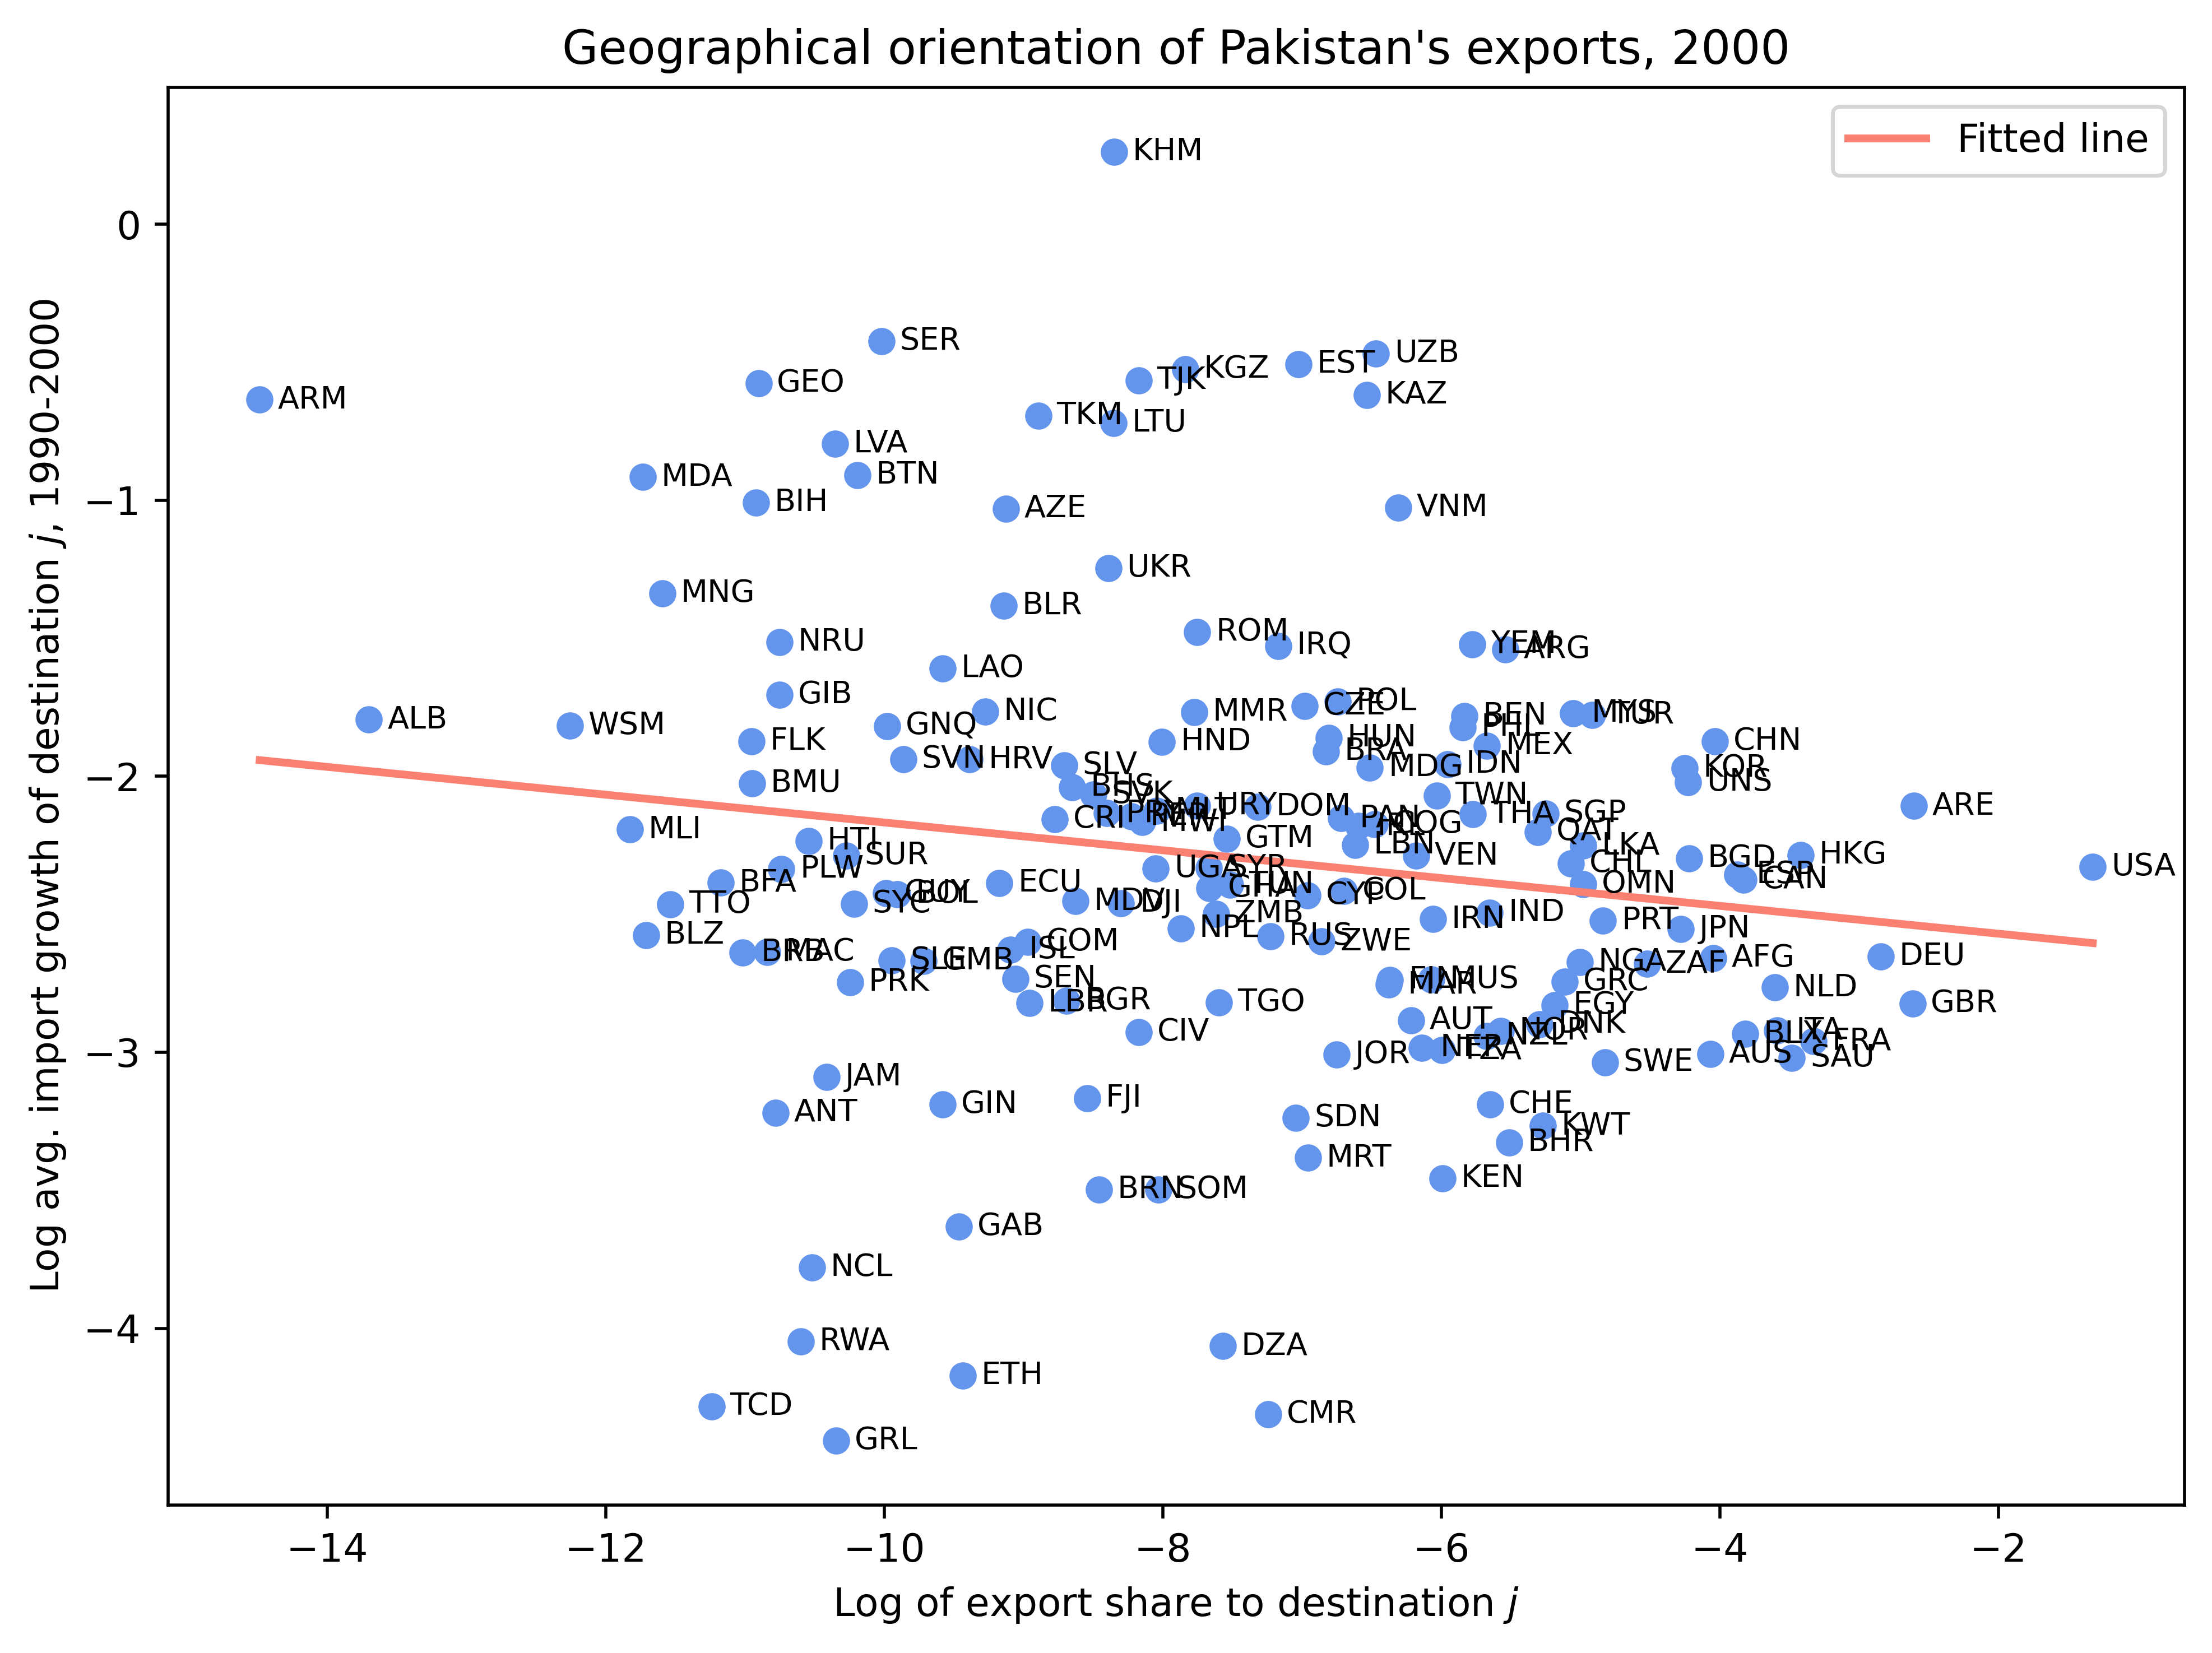

In [11]:
# 2000년 자료에서 Colombia("COL")와 Pakistan("PAK") 각각 그래프 생성
for country, title in [
    ("COL", "Geographical orientation of Colombia's exports, 2000"),
    ("PAK", "Geographical orientation of Pakistan's exports, 2000")
]:
    sub = df[(df['ccode'] == country) & (df['year'] == 2000)]
    plt.figure(figsize=(8,6), dpi=500)
    plt.scatter(sub['ln_x'], sub['ln_y'], color='cornflowerblue')
    
    # 각 점의 바로 오른쪽에 pcode 레이블 표시 (오프셋 적용)
    offset = 0.01 * (sub['ln_x'].max() - sub['ln_x'].min())
    for _, row in sub.iterrows():
        plt.text(row['ln_x'] + offset, row['ln_y'], str(row['pcode']), 
                 fontsize=8, va='center')
    
    # 선형 피팅
    slope, intercept = np.polyfit(sub['ln_x'], sub['ln_y'], 1)
    x_fit = np.linspace(sub['ln_x'].min(), sub['ln_x'].max(), 100)
    plt.plot(x_fit, intercept + slope * x_fit, color='salmon',
             label='Fitted line', linewidth=2)
    
    plt.xlabel("Log of export share to destination $j$")
    plt.ylabel("Log avg. import growth of destination $j$, 1990-2000")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 4. 수출의 성장 방향성(2)

- 어떤 나라가 수입 성장률이 높은 분야나 나라에 얼마나 많이 수출하는지를 통해, 그 국가의 수출 방향성이 유리한지, 불리한지를 평가할 수 있다. 
<br><br>
- 바로 앞 절에서는 수출하는 상대 **나라**만을 고려했으나, 수출 **제품**과 상대 **나라**를 동시에 고려하면서 수출의 성장 방향성을 평가할 수 있다.
<br><br>
- 즉, 특정 제품($k$)이 특정 대상국($j$)으로 수출되는 비중과, 그 제품/대상국의 지난 10년간 평균 수입 성장률을 비교하는 것이다. 만약 두 변수 간에 음의 상관관계가 나타난다면, 이는 자국이 상대적으로 성장률이 낮은 제품에 집중하고 있다는 의미다. 정부가 해당 부문에 투자하여 외연적 증가(extensive margin)를 촉진할 필요가 있음을 의미한다고 볼 수도 있다.

### 데이터(제품/나라별)

    # UNCTAD (2012) 원래 데이터세트가 용량이 너무 큼
    # BilateralTrade.dta 파일 불러오기
    BilateralTrade = pd.read_stata("../Data/BilateralTrade.dta")
    BilateralTrade = BilateralTrade[BilateralTrade['year'] > 2000]
    BilateralTrade.to_csv("../Data/BilateralTrade.csv")

In [12]:
# BilateralTrade.csv 파일 읽기
df = pd.read_csv("../Data/BilateralTrade.csv")
df

,Unnamed: 0,ccode,pcode,year,isic2_3d,imp_tv,imp_q,imp_uv,exp_tv,exp_q,exp_uv,id
0,0,ABW,AIA,2002,311,0.000,NaN,NaN,773.574,433812.0,1.783201,1.0
1,1,ABW,AIA,2003,311,0.000,NaN,NaN,63.463,50000.0,1.269260,1.0
2,2,ABW,ALB,2004,351,8.452,11125.0,NaN,0.000,NaN,NaN,2.0
3,3,ABW,ALB,2004,352,1.363,1312.0,NaN,0.000,NaN,NaN,3.0
4,28,ABW,ARE,2003,311,0.000,NaN,NaN,79.050,127609.0,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1189499,5563250,ZWE,ZMB,2002,385,52.346,NaN,NaN,518.514,NaN,NaN,545571.0
1189500,5563251,ZWE,ZMB,2004,385,46.147,942.0,48.988320,121.252,19096.0,6.206012,545571.0
1189501,5563265,ZWE,ZMB,2001,390,61.541,NaN,NaN,7.266,NaN,NaN,545572.0
1189502,5563266,ZWE,ZMB,2002,390,32.965,NaN,NaN,720.208,NaN,NaN,545572.0


### 수출의 제품/나라별 비중 및 제품/나라의 수입성장률

In [13]:
# 국가(ccode), 제품(isic2_3d), 연도별 총수출액 및 수출 비중 계산
df['tot_exp'] = df.groupby(['ccode', 'isic2_3d', 'year'])['exp_tv'].transform('sum')
df['export_share'] = df['exp_tv'] / df['tot_exp']

# 목적국(pcode) & 제품(isic2_3d)별 연도별 총수입 계산
imp = (df.groupby(['pcode', 'isic2_3d', 'year'])['exp_tv']
       .sum()
       .reset_index()
       .rename(columns={'exp_tv': 'totimppcode'}))
imp = imp.sort_values(['pcode', 'isic2_3d', 'year'])
imp['totimppcode_lag'] = imp.groupby(['pcode', 'isic2_3d'])['totimppcode'].shift(1)
imp['gamma_totimppcode'] = imp['totimppcode'] / imp['totimppcode_lag'] - 1

# 2000~2004년 동안 (pcode, isic2_3d)별 평균 수입 성장률 계산
imp_avg = (imp[(imp['year'] >= 2000) & (imp['year'] <= 2004)]
            .groupby(['pcode', 'isic2_3d'])['gamma_totimppcode']
            .mean()
            .reset_index()
            .rename(columns={'gamma_totimppcode': 'avg_imp_g_2000_2004'}))

# 원래 데이터와 합치기
df = pd.merge(df, imp_avg, on=['pcode', 'isic2_3d'], how='left')

# 0 이상의 값만 남기고 로그값 생성
df = df[(df['export_share'] > 0) & (df['avg_imp_g_2000_2004'] > 0)]
df['ln_x'] = np.log(df['export_share'])
df['ln_y'] = np.log(df['avg_imp_g_2000_2004'])
df

,Unnamed: 0,ccode,pcode,year,isic2_3d,imp_tv,imp_q,imp_uv,exp_tv,exp_q,exp_uv,id,tot_exp,export_share,avg_imp_g_2000_2004,ln_x,ln_y
4,28,ABW,ARE,2003,311,0.000,NaN,NaN,79.050,127609.0,NaN,10.0,22402.759,0.003529,0.113866,-5.646859,-2.172732
32,66,ABW,ARG,2002,369,71.167,347562.0,0.204761,11.067,66.0,167.681800,27.0,249.617,0.044336,0.185952,-3.115960,-1.682266
39,78,ABW,ARG,2003,381,33.982,2854.0,11.906800,0.508,30.0,16.933330,30.0,1532.282,0.000332,0.218641,-8.011787,-1.520324
41,81,ABW,ARG,2002,382,0.000,NaN,NaN,0.603,31.0,19.451610,31.0,1135.912,0.000531,0.281489,-7.541029,-1.267663
45,87,ABW,ARG,2003,384,0.000,NaN,NaN,3.352,449.0,7.465479,33.0,1794.105,0.001868,0.475528,-6.282704,-0.743329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189499,5563250,ZWE,ZMB,2002,385,52.346,NaN,NaN,518.514,NaN,NaN,545571.0,4747.323,0.109222,0.113193,-2.214369,-2.178662
1189500,5563251,ZWE,ZMB,2004,385,46.147,942.0,48.988320,121.252,19096.0,6.206012,545571.0,964.111,0.125766,0.113193,-2.073335,-2.178662
1189501,5563265,ZWE,ZMB,2001,390,61.541,NaN,NaN,7.266,NaN,NaN,545572.0,1158.477,0.006272,0.064259,-5.071656,-2.744836
1189502,5563266,ZWE,ZMB,2002,390,32.965,NaN,NaN,720.208,NaN,NaN,545572.0,56468.068,0.012754,0.064259,-4.361891,-2.744836


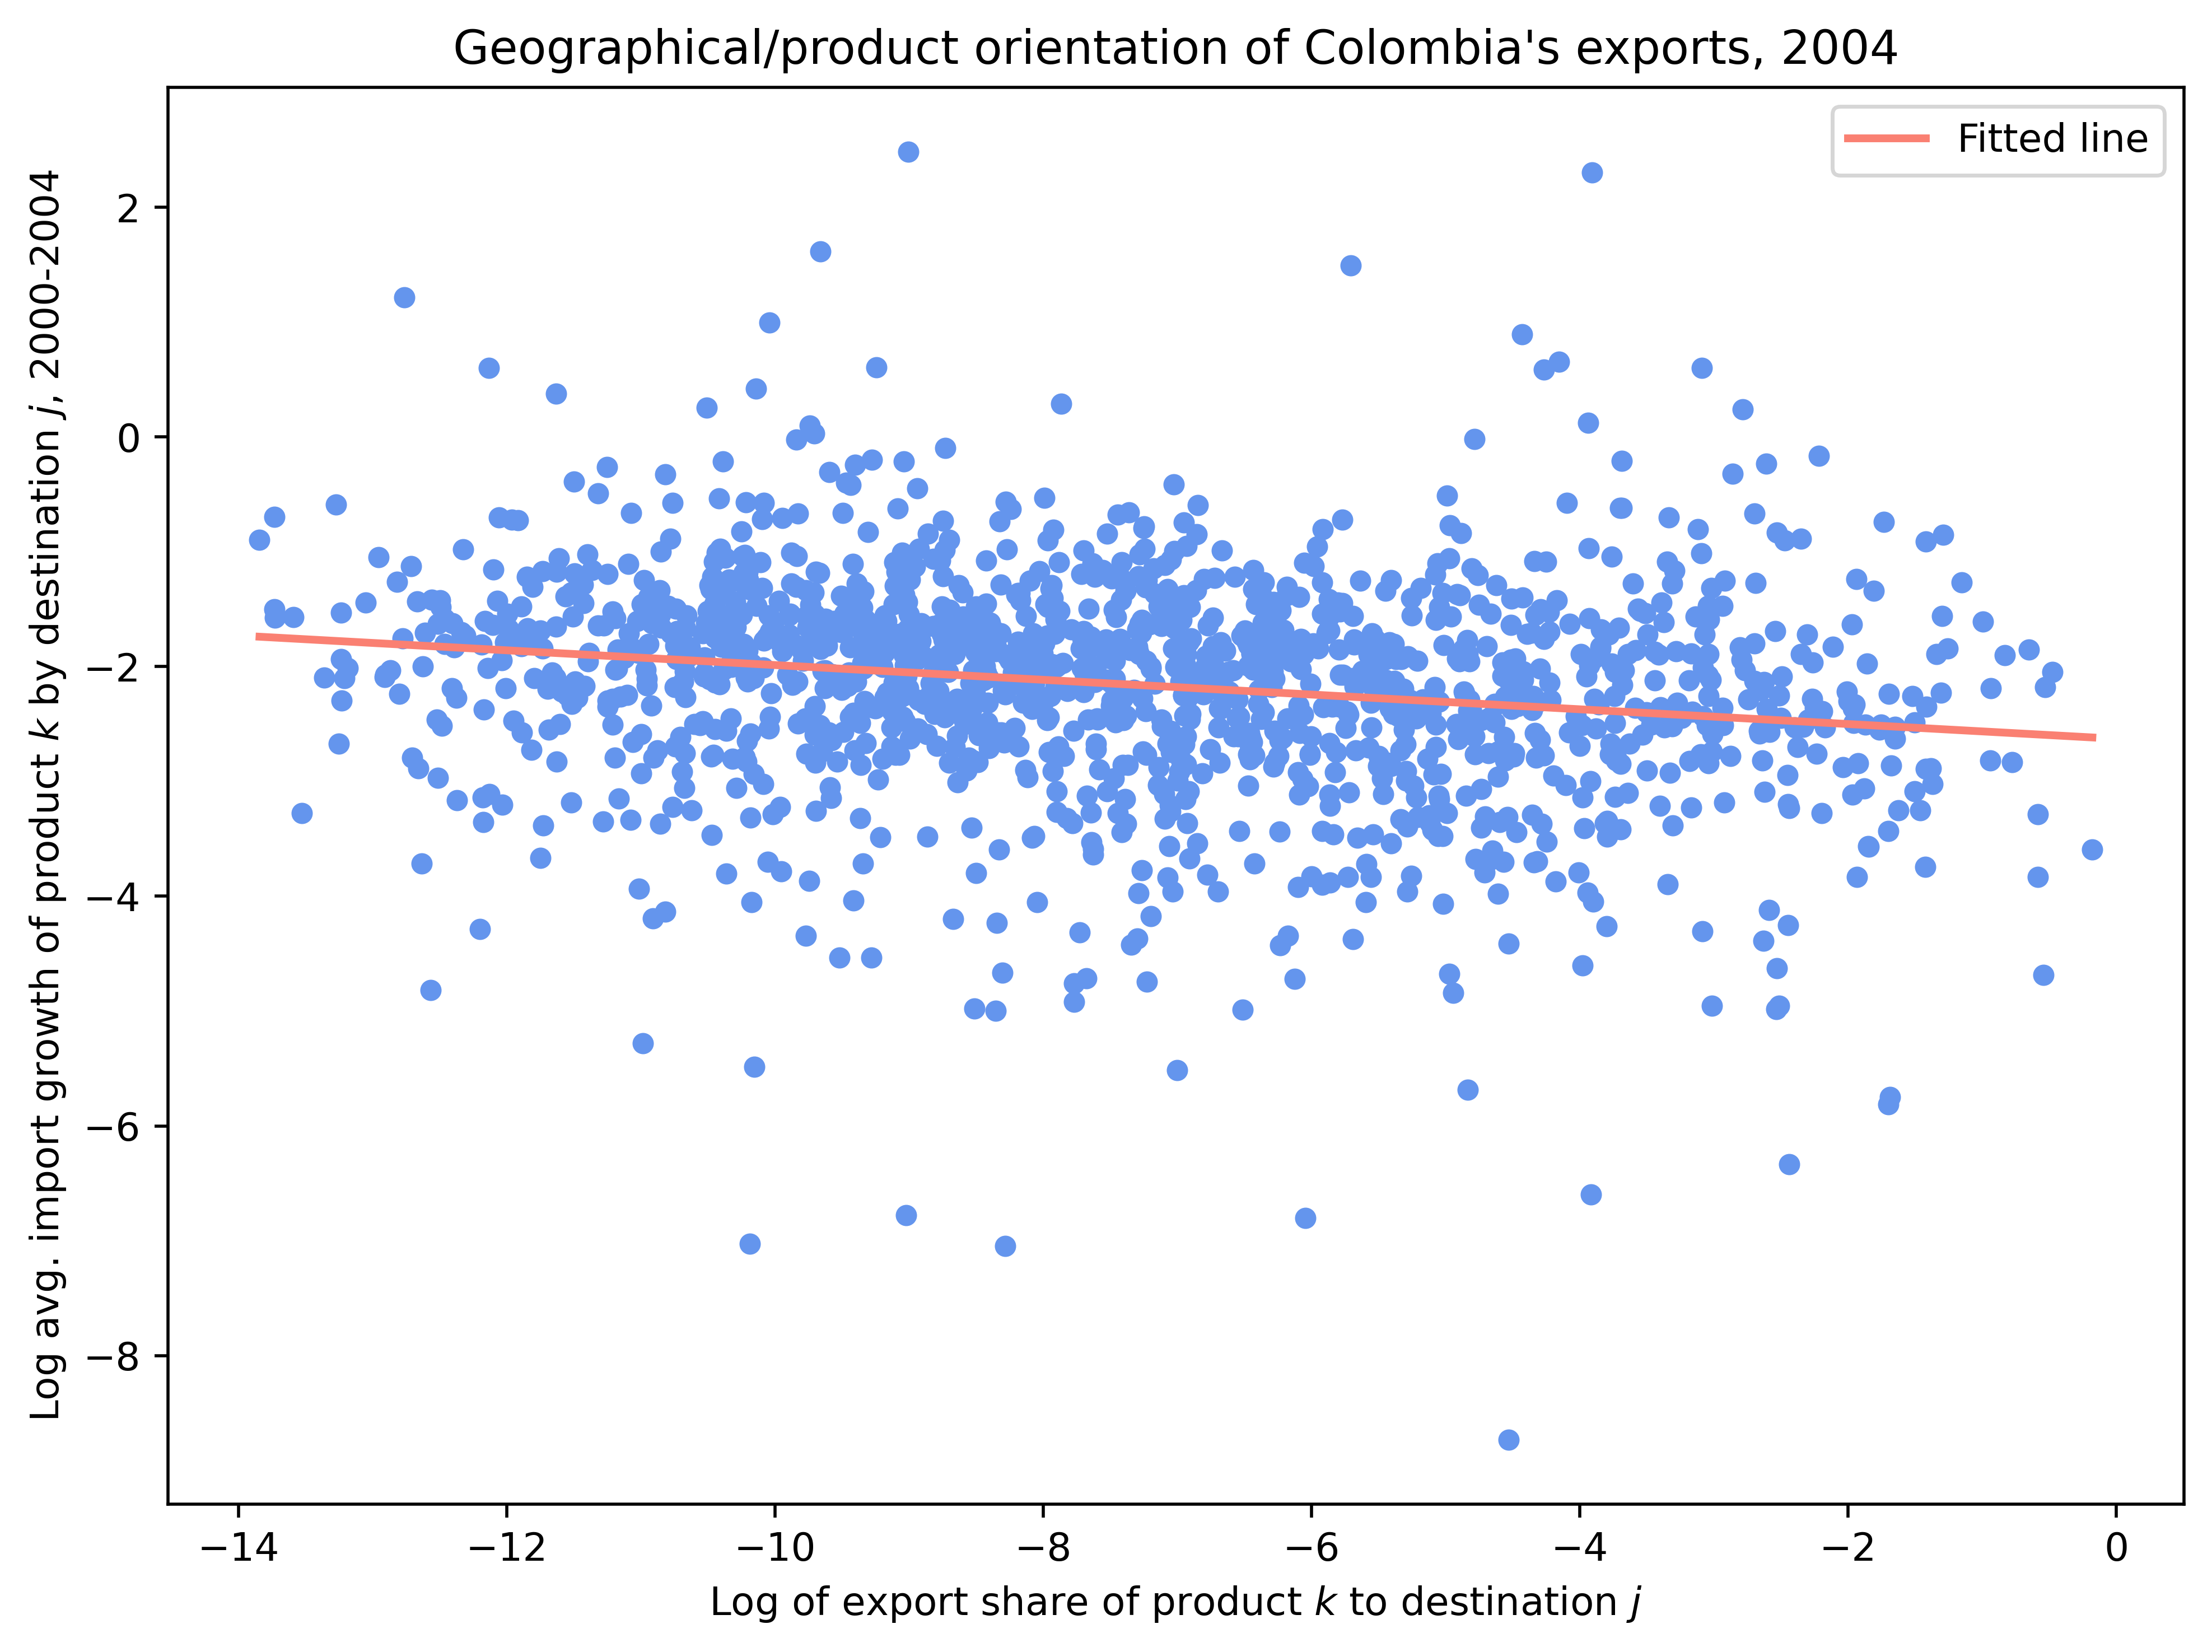

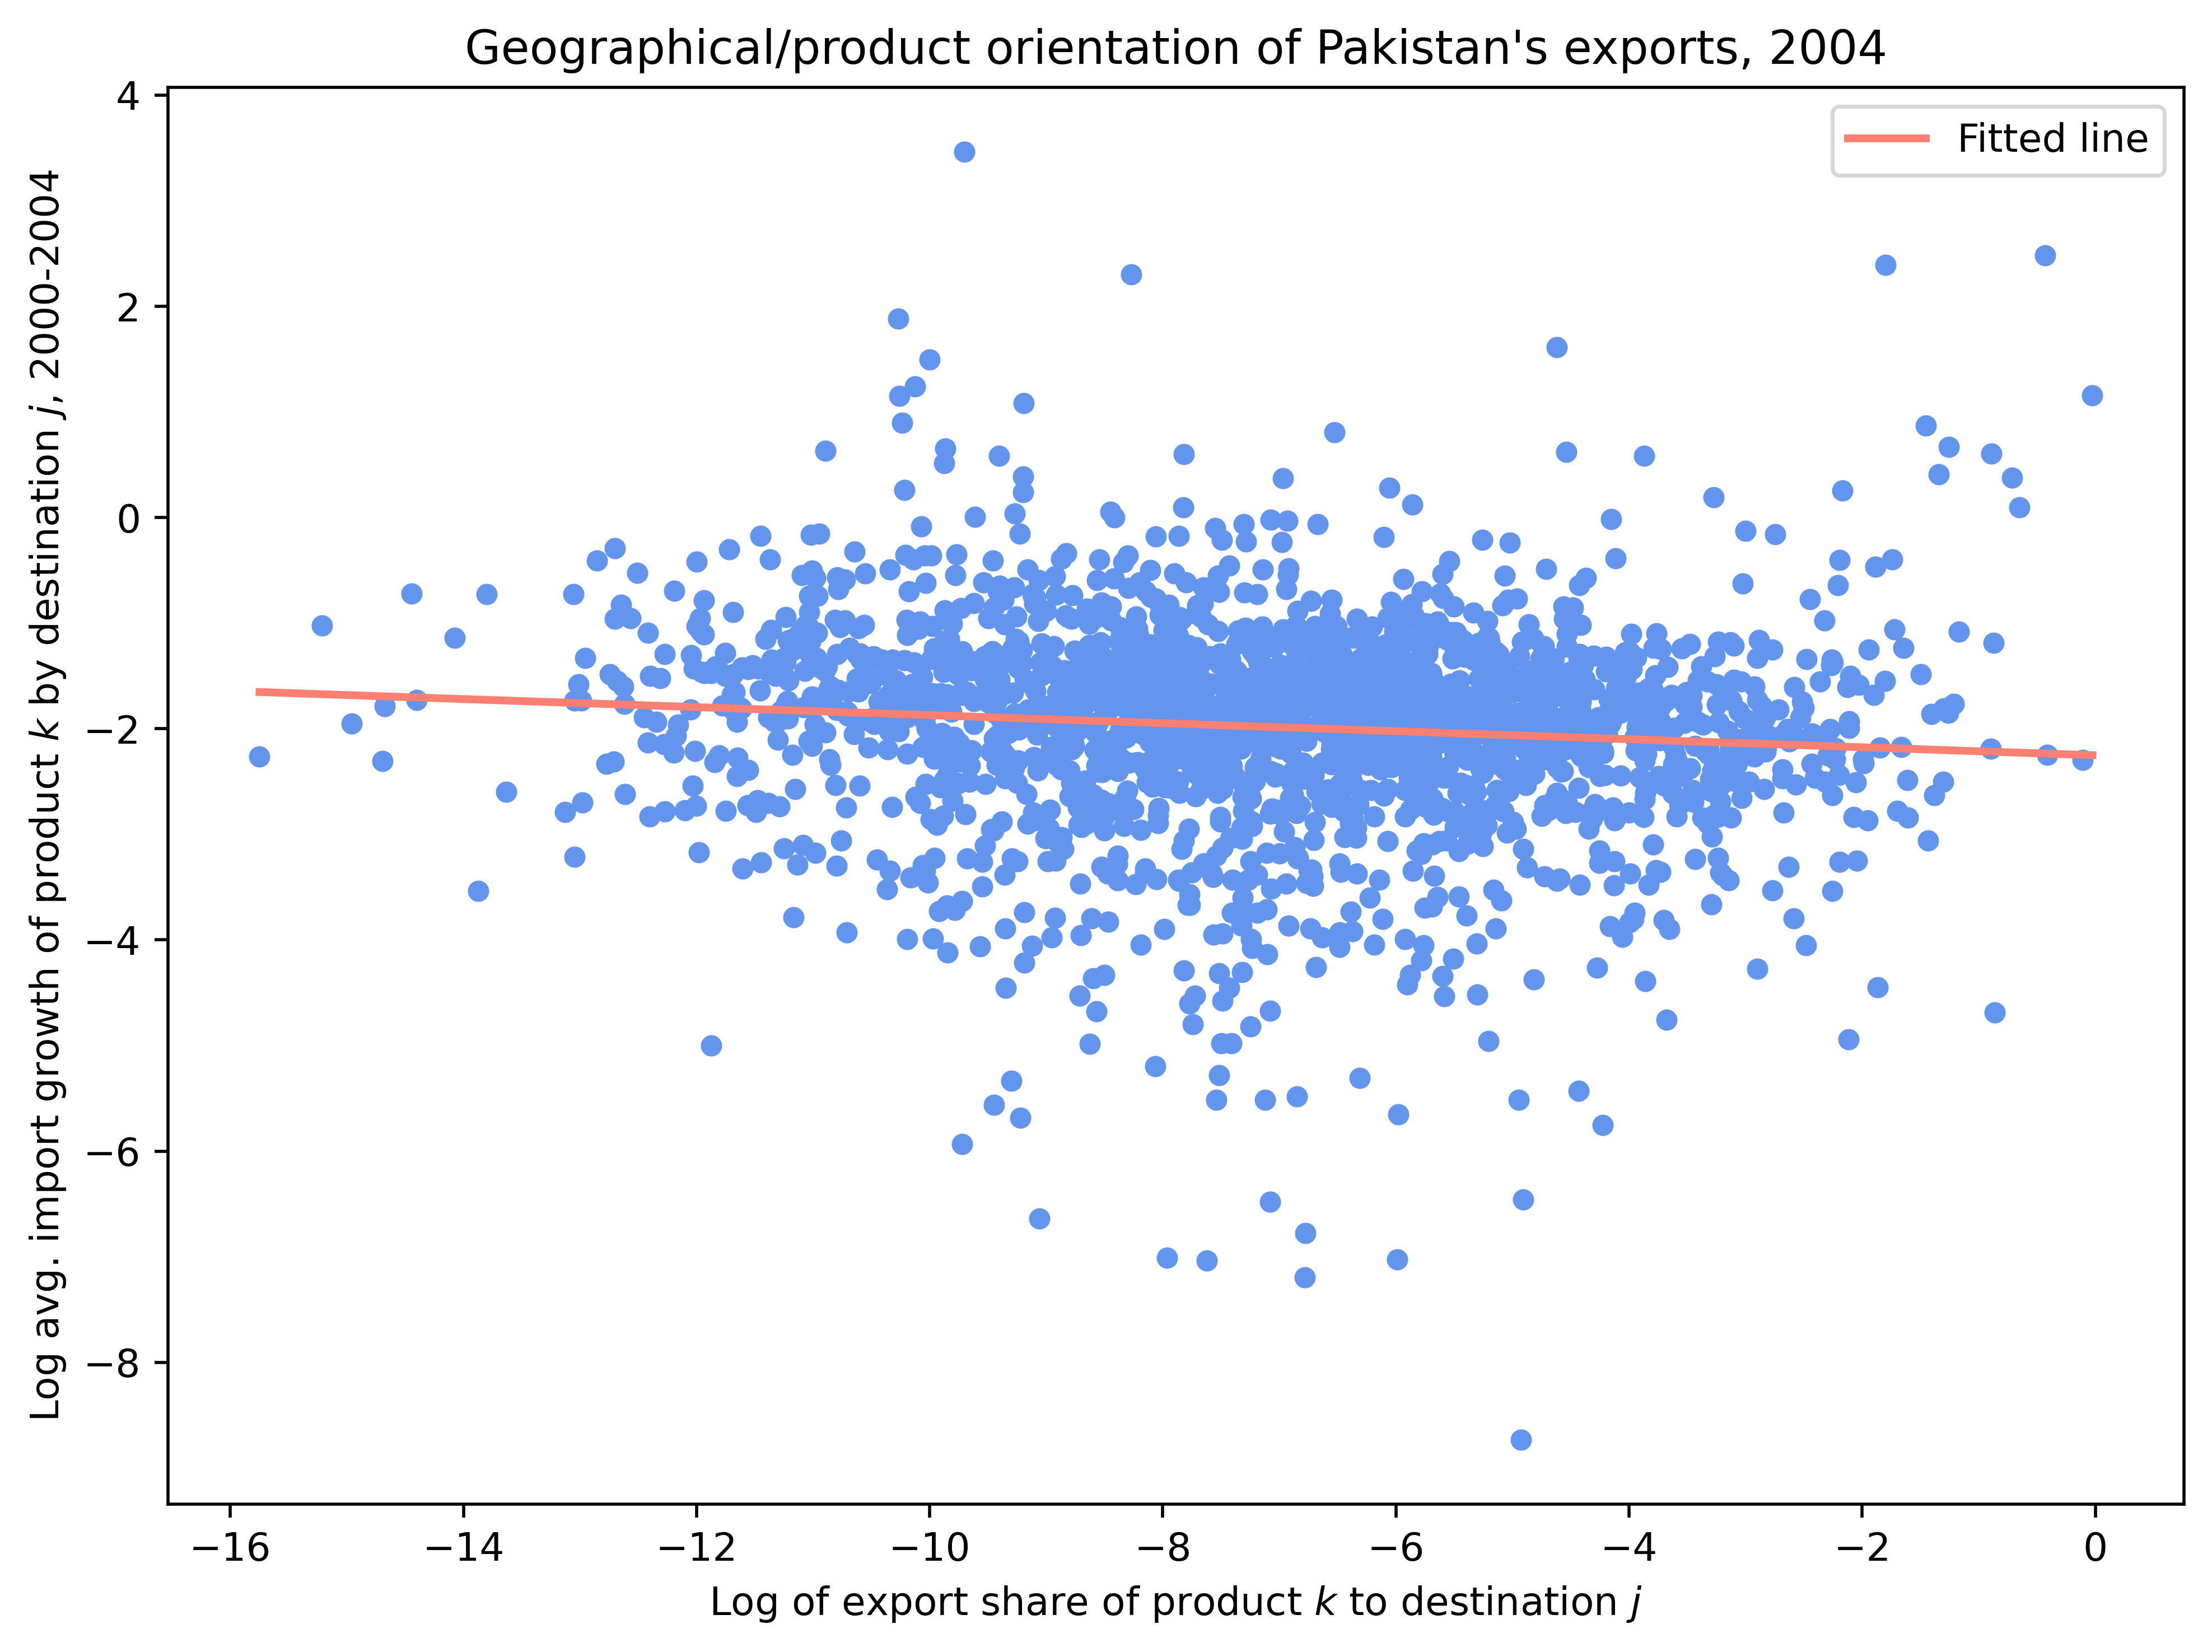

In [14]:
for country, title in [
    ("COL", "Geographical/product orientation of Colombia's exports, 2004"),
    ("PAK", "Geographical/product orientation of Pakistan's exports, 2004")
]:
    sub = df[(df['ccode'] == country) & (df['year'] == 2004)]
    plt.figure(figsize=(8,6), dpi=500)
    
    # 산점도 그리기
    plt.scatter(sub['ln_x'], sub['ln_y'], color='cornflowerblue', s=20)
    
    # 선형 피팅 
    slope, intercept = np.polyfit(sub['ln_x'], sub['ln_y'], 1)
    x_fit = np.linspace(sub['ln_x'].min(), sub['ln_x'].max(), 100)
    plt.plot(x_fit, intercept + slope * x_fit, color='salmon', 
             label='Fitted line', linewidth=2)
    
    plt.xlabel("Log of export share of product $k$ to destination $j$")
    plt.ylabel("Log avg. import growth of product $k$ by destination $j$, 2000-2004")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()